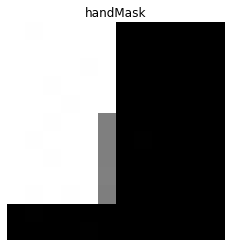

[[0.         0.         0.         0.         0.         1.
  1.         1.         1.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  1.         1.         1.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  1.         1.         1.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  1.         1.         1.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  1.         1.         1.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  1.         1.         1.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  1.         1.         1.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  1.         1.         1.         1.

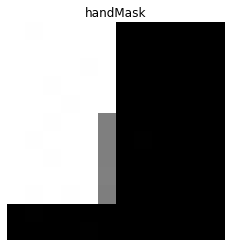

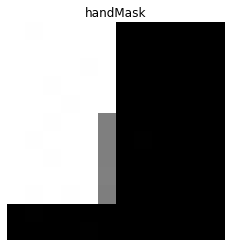

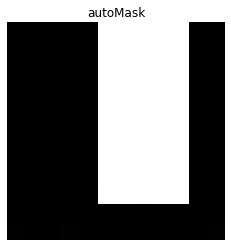

imgSize 144


In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np



def imshow(inputImg, title):
    # print(inputImg)
    plt.clf()
    plt.title(title)
    plt.axis("off")
    # print("inputImg.shape", inputImg.shape)
    plt.imshow(cv2.cvtColor(inputImg, cv2.COLOR_BGR2RGB), interpolation='none')
    plt.show()
    # plt.axes
    return inputImg

orgHandMask= cv2.imread("hand.jpg",cv2.IMREAD_GRAYSCALE)
orgAutoMask  = cv2.imread("machine.jpg",cv2.IMREAD_GRAYSCALE)

#handMask= cv2.imread("hand.jpg",cv2.IMREAD_GRAYSCALE)
#autoMask  = cv2.imread("machine.jpg",cv2.IMREAD_GRAYSCALE)

imshow(orgHandMask,"handMask")

height,width= orgHandMask.shape
imgSize=height*width 
TruePositive = 0.0 
FalsePositive = 0.0
FalseNegative = 0.0
handMaskAccumLum = 0.0
autoMaskAccumLum = 0.0

autoMask = orgAutoMask.astype("float64")
handMask = orgHandMask.astype("float64")

for y in range(height):
    for x in range(width):
        #count1 += autoMask[y,x]

        #autoMask[y,x]= (orgAutoMask[y,x]/255*100)
        #handMask[y,x]= (orgHandMask[y,x]/255*100)
        
        autoMask[y,x]= (orgAutoMask[y,x]/255)
        handMask[y,x]= (orgHandMask[y,x]/255)
        
        
        #print("auto",autoMask[y,x])
        
        #handMask[y,x] = 50
        #imshow(handMask,"handMask")
        
        if (autoMask[y,x] == handMask[y,x]):
            TruePositive += handMask[y,x]
            
        if (autoMask[y,x] < handMask[y,x]):
            FalseNegative += (handMask[y,x]-autoMask[y,x])
            TruePositive += autoMask[y,x]/handMask[y,x]
            #print((handMask[y,x]-autoMask[y,x])/100)
            
        if (autoMask[y,x] > handMask[y,x]):
            FalsePositive += autoMask[y,x] - handMask[y,x]
            TruePositive += handMask[y,x]/autoMask[y,x]
            #print((autoMask[y,x] - handMask[y,x])/100)
            
        handMaskAccumLum += handMask[y,x]
        autoMaskAccumLum += autoMask[y,x]
        #print(handMask[y,x]/100)
        #print("hand",handMask[y,x])
        
            
print(autoMask)          


print ("handMaskAccumLum",handMaskAccumLum)

print("TruePositive",TruePositive)
print("FalseNegative",FalseNegative)
print("FalsePositive",FalsePositive)
            
TruePositive= (TruePositive/handMaskAccumLum)*100
FalseNegative=(FalseNegative/handMaskAccumLum) *100
FalsePositive1=(FalsePositive/autoMaskAccumLum)*100
FalsePositive=(FalsePositive/handMaskAccumLum)*100

print("TruePositive%",TruePositive,"% of accumulated pixel values of handmask")
print("FalseNegative%",FalseNegative,"% of accumulated pixel values of handmask")
print("FalsePositive%",FalsePositive,"% of accumulated pixel values of handmask")
print("FalsePositive%",FalsePositive1,"% of accumulated pixel values of automask")

print(imgSize)

autoMask = autoMask*255
handMask = handMask*255

autoMask = orgAutoMask.astype("uint8")
handMask = orgHandMask.astype("uint8")

imshow(handMask,"handMask")


imshow(orgHandMask,"handMask")
imshow(orgAutoMask,"autoMask")




print("imgSize", imgSize)